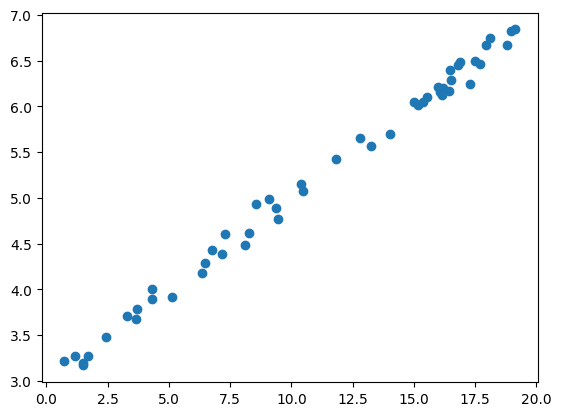

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az


N = 50
true_alpha = 3.0 # * 1000 lei
true_beta = 0.2 # profitul obtinut per an de experienta
eps_real = np.random.normal(0, 0.1, N)


x = np.random.uniform(0,20,N)
true_y = true_alpha + true_beta * x
y = true_y + eps_real

plt.scatter(x, y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, eps]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

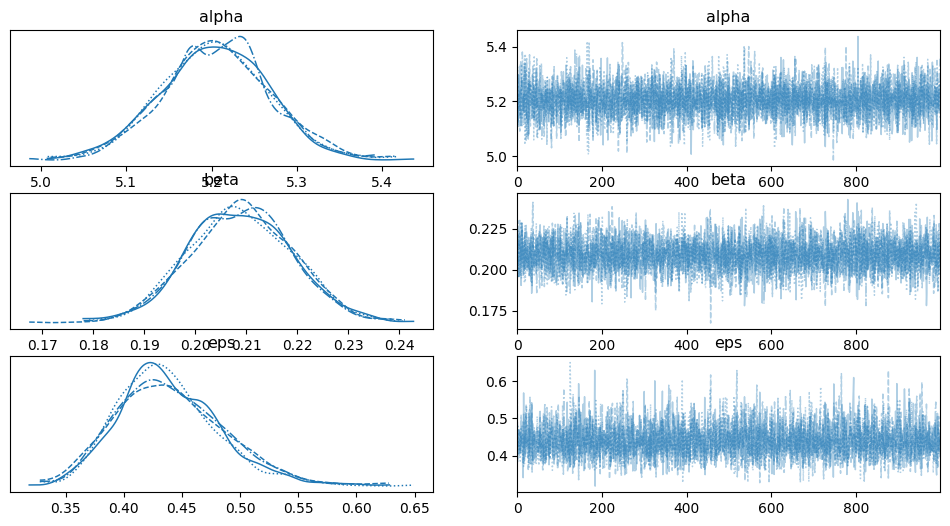

In [41]:
x_prime = x - x.mean()


with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    eps = pm.HalfCauchy('eps', 5)
    miu = pm.Deterministic('miu', alpha + beta * x_prime)
    
    y_obs = pm.Normal('y_obs', mu=miu, sigma=eps, observed=y)
    trace = pm.sample(1000, tune=1000,return_inferencedata=True)
    

az.plot_trace(trace,var_names=['alpha', 'beta', 'eps'])

Infered alpha: 2.918968070087385, Infered beta: 0.20886385641241267


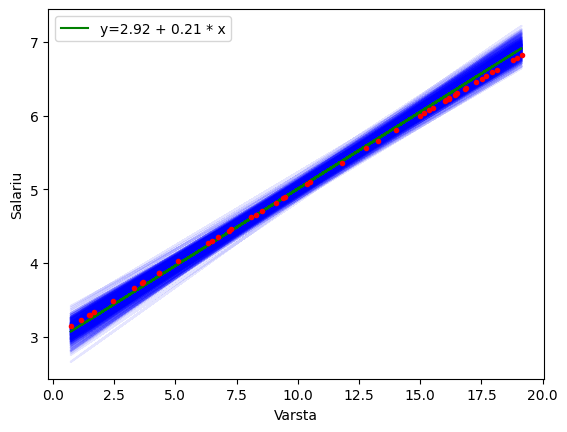

In [45]:
alpha_m = trace.posterior['alpha'].mean().item()
beta_m = trace.posterior['beta'].mean().item()

# infered alpha and beta
i_alpha = alpha_m - beta_m * x.mean().item()
i_beta = beta_m


print(f'Infered alpha: {i_alpha}, Infered beta: {i_beta}')


posterior_g = trace.posterior.stack(samples={"chain", "draw"})
draws = range(0, posterior_g.samples.size, 10)
post_a = posterior_g['alpha'][draws].values
post_b = posterior_g['beta'][draws].values
plt.plot(x, post_a - post_b * x.mean() + post_b * x[:, None], color='blue', alpha=0.1)
plt.plot(x, i_alpha + i_beta * x, color='green', label=f'y={i_alpha:.2f} + {i_beta:.2f} * x')
plt.xlabel('Varsta')
plt.ylabel('Salariu')
plt.plot(x, true_y, color='red', marker='.', linestyle='None')
plt.legend()
plt.show()